In [2]:
import sys, os
import numpy as np
from matplotlib import pyplot as plt

In [3]:
parent_dir = os.path.abspath(os.pardir)
libpath = os.path.join(parent_dir, 'c3dp_source')
outpath = os.path.join(parent_dir, 'out')
mantid_path = os.path.join (parent_dir, 'mantid')

if not libpath in sys.path:
    sys.path.insert(0, libpath)

In [4]:
jiao_colli = os.path.join (outpath, 'out/plastic_collimator-183178956')
# simulation = os.path.join (jiao_colli, 'sim_masked2.nxs')
simulation = os.path.join (mantid_path, 'sim_small_masked.nxs')
experimental = os.path.join (mantid_path, 'SNAP_43682_masked.nxs')

In [5]:
import reduce_nexasdata_using_mantid as red
import normalization_by_area as nrm

/home/fi0/anaconda2/envs/mcvine/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
step = 0.01

In [7]:
binning = [0.5, step, 4.]

d_simulation, I_simulation, error_simulation = red.mantid_reduction(simulation, binning)
area_sim = nrm.area_under_curve(I_simulation, step, method='my_code')
area_sim_laterD = nrm.area_under_curve(I_simulation[(d_simulation>2.2) & (d_simulation<4)], step, method='my_code')
print (area_sim)

46181.39422038567


In [8]:
print (area_sim_laterD)

10250.064577984751


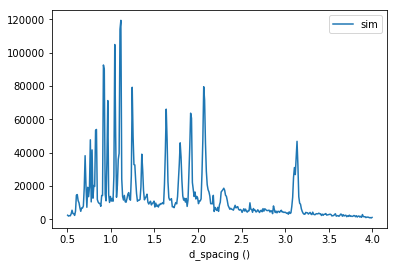

In [9]:
plt.figure()
plt.plot (d_simulation, I_simulation, label ="sim")
# plt.plot (d_exp, I_exp, label ="exp")
plt.legend()
# plt.errorbar (d_exp, I_exp, error_exp)
plt.xlabel('d_spacing ()')
plt.show()

In [10]:
d_exp, I_exp, error_exp = red.mantid_reduction(experimental, binning)
area_exp = nrm.area_under_curve(I_exp, step, method='my_code')
area_exp_laterD = nrm.area_under_curve(I_exp[(d_exp>2.2) & (d_exp<4)], step, method='my_code')
print (area_exp)

33316.58


In [11]:
print (area_exp_laterD)

14357.000000000002


In [12]:
normalization_factor= area_exp/area_sim
normalization_factor_latedD = area_sim_laterD/area_exp_laterD
print (normalization_factor)
print (normalization_factor_latedD)

0.7214286307816405
0.7139419501277948


In [13]:
I_exp_norm = nrm.normalization (I_exp, normalization_factor)
I_sim_norm_later = nrm.normalization (I_simulation[(d_simulation>2.2) & (d_simulation<4)], normalization_factor_latedD)

In [14]:
d_simulation, I_simulation, error_simulation = red.mantid_reduction(simulation, binning)

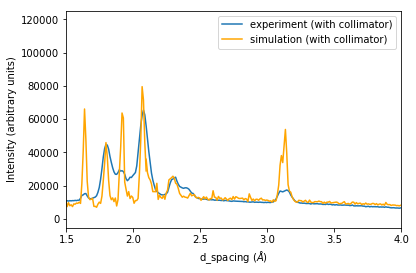

In [20]:
plt.figure()
plt.errorbar (d_exp, I_exp_norm, label= "experiment (with collimator)")
plt.errorbar (d_simulation[(d_simulation<2.1) & (d_simulation>1)],I_simulation[(d_simulation<2.1) & (d_simulation>1)], color='orange', label="simulation (with collimator)")
plt.errorbar (d_simulation[(d_simulation>2.09) & (d_simulation<4)],I_simulation[(d_simulation>2.09) & (d_simulation<4)]+7000, color='orange')


plt.legend()
plt.xlabel('d_spacing ($\AA$)')
plt.ylabel ('Intensity (arbitrary units)')
plt.xlim (1.5,4)
plt.show()